In [1]:
#Imports
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np

pandas.set_option('display.max_columns', None)  
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('display.precision', 3)

In [2]:
data = pandas.read_csv('./data/Train.csv', sep=',', na_values=".")

In [3]:
data.describe(include='all')

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),Age_group
count,3000,3000.000,3000.000,3000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000,3000,3000,3000,3000,3000,3000,3000.000,3000,3000,3000.000,3000.000,3000.000,3000,3000,3000.000,3000.000
unique,2,NaN,NaN,1606,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,4,4,3,4,NaN,4,3,NaN,NaN,NaN,4,3,NaN,NaN
top,Female,NaN,NaN,135/93,NaN,NaN,NaN,NaN,NaN,NaN,Moderate,Former,None,Balanced,None,None,None,NaN,Good,Normal,NaN,NaN,NaN,Undergraduate,Medium,NaN,NaN
freq,1511,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,1407,1181,1201,1183,1299,1198,1451,NaN,1073,1519,NaN,NaN,NaN,884,1223,NaN,NaN
mean,NaN,168.591,72.537,NaN,234.030,25.550,126.654,0.932,0.475,47.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.868,NaN,NaN,5.477,5.029,5.956,NaN,NaN,53.486,1.219
std,NaN,9.293,13.191,NaN,24.521,4.367,18.226,0.444,0.210,14.336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.756,NaN,NaN,2.585,2.871,3.475,NaN,NaN,20.570,0.721
min,NaN,141.131,32.538,NaN,148.812,12.050,69.867,-0.220,0.200,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.382,NaN,NaN,1.000,0.006,0.002,NaN,NaN,18.000,0.000
25%,NaN,161.630,63.223,NaN,216.757,22.454,114.393,0.561,0.282,36.735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.648,NaN,NaN,3.222,2.607,2.873,NaN,NaN,36.000,1.000
50%,NaN,168.216,71.449,NaN,234.377,25.352,126.802,0.940,0.462,46.964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.015,NaN,NaN,5.497,5.096,5.957,NaN,NaN,53.000,1.000
75%,NaN,175.523,81.703,NaN,250.647,28.404,139.377,1.295,0.639,56.829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.087,NaN,NaN,7.680,7.476,8.991,NaN,NaN,72.000,2.000


In [4]:
#Comprovar quins camps tenen valors nulls
data.isnull().any()

Gender                         False
Height (cm)                    False
Weight (kg)                    False
Blood Pressure (s/d)           False
Cholesterol Level (mg/dL)      False
BMI                            False
Blood Glucose Level (mg/dL)    False
Bone Density (g/cm²)           False
Vision Sharpness               False
Hearing Ability (dB)           False
Physical Activity Level        False
Smoking Status                 False
Alcohol Consumption            False
Diet                           False
Chronic Diseases               False
Medication Use                 False
Family History                 False
Cognitive Function             False
Mental Health Status           False
Sleep Patterns                 False
Stress Levels                  False
Pollution Exposure             False
Sun Exposure                   False
Education Level                False
Income Level                   False
Age (years)                    False
Age_group                      False
d

In [5]:
values = {"Alcohol Consumption": 'Never', "Chronic Diseases": 'No', "Medication Use": 'No', "Family History": 'No Disease', "Education Level": 'No Education'}
data = data.fillna(value=values)
data.isnull().any()

Gender                         False
Height (cm)                    False
Weight (kg)                    False
Blood Pressure (s/d)           False
Cholesterol Level (mg/dL)      False
BMI                            False
Blood Glucose Level (mg/dL)    False
Bone Density (g/cm²)           False
Vision Sharpness               False
Hearing Ability (dB)           False
Physical Activity Level        False
Smoking Status                 False
Alcohol Consumption            False
Diet                           False
Chronic Diseases               False
Medication Use                 False
Family History                 False
Cognitive Function             False
Mental Health Status           False
Sleep Patterns                 False
Stress Levels                  False
Pollution Exposure             False
Sun Exposure                   False
Education Level                False
Income Level                   False
Age (years)                    False
Age_group                      False
d

<Axes: >

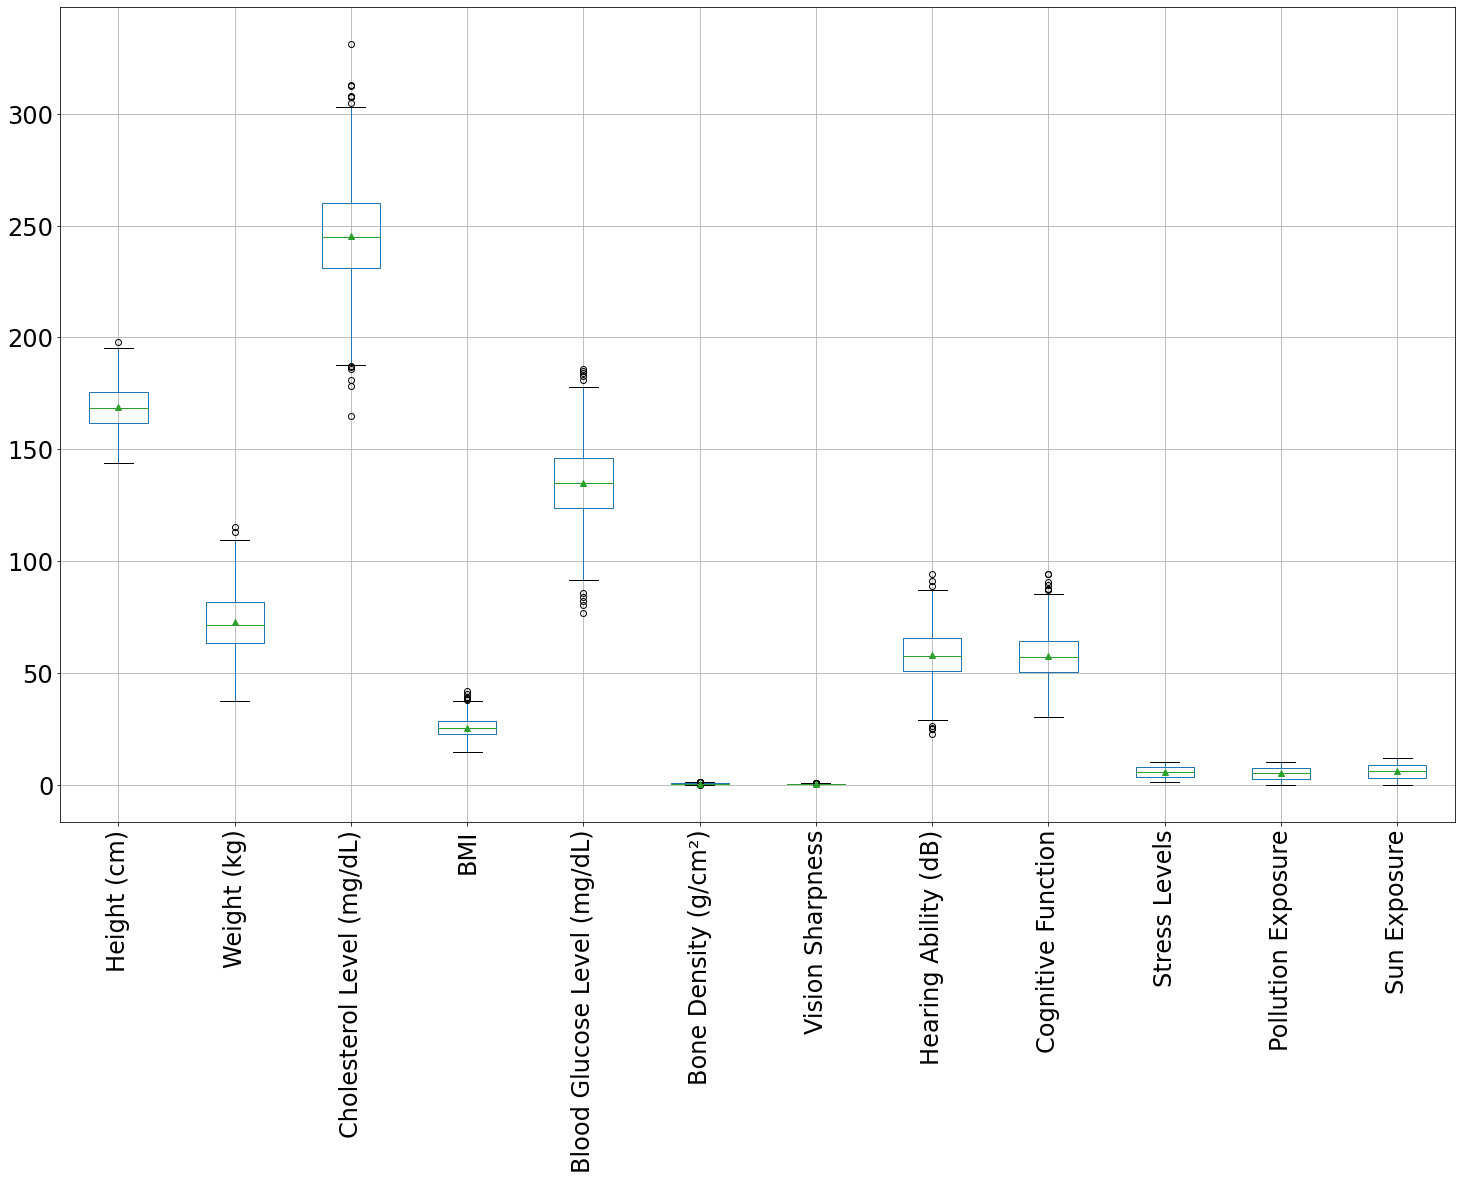

In [6]:
avis = data[data['Age_group'] == 2]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = list(avis.select_dtypes(include=numerics))
columns = columns[:len(columns)-2]
avis.boxplot(meanline=False,showmeans=True,rot=90,return_type='axes', column=columns, figsize=(25,15), fontsize=24)

<Axes: >

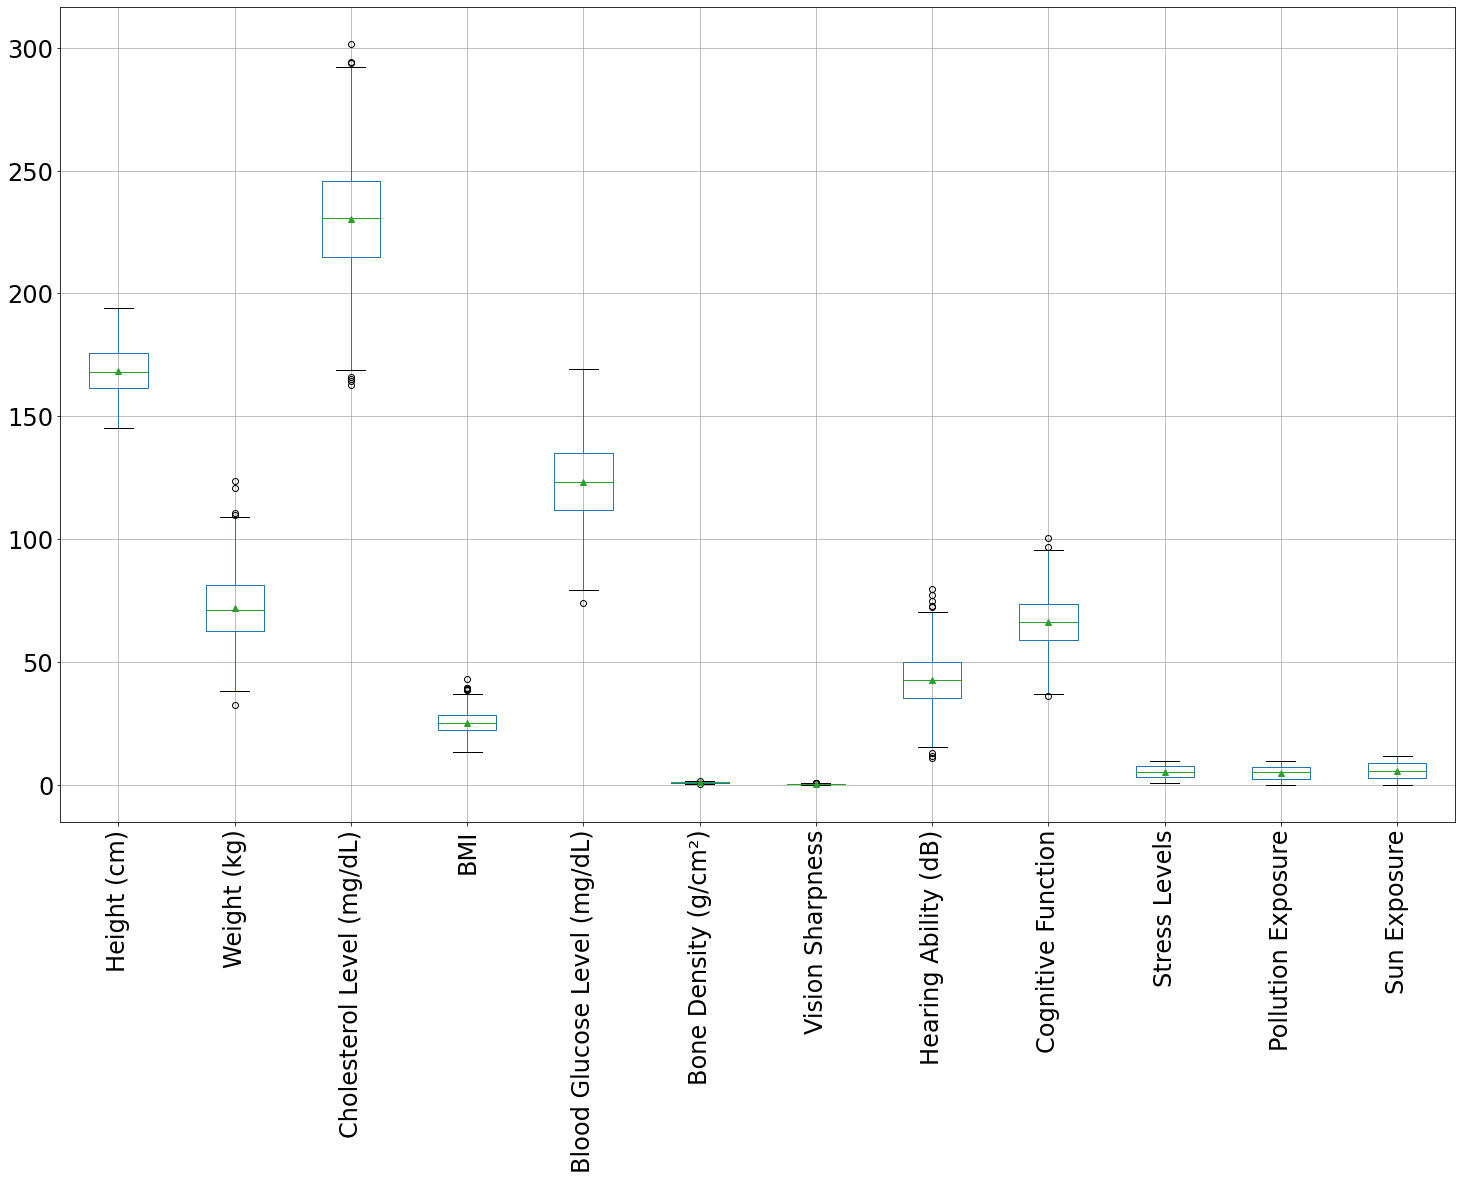

In [7]:
adults = data[data['Age_group'] == 1]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = list(adults.select_dtypes(include=numerics))
columns = columns[:len(columns)-2]
adults.boxplot(meanline=False,showmeans=True,rot=90,return_type='axes', column=columns, figsize=(25,15), fontsize=24)

<Axes: >

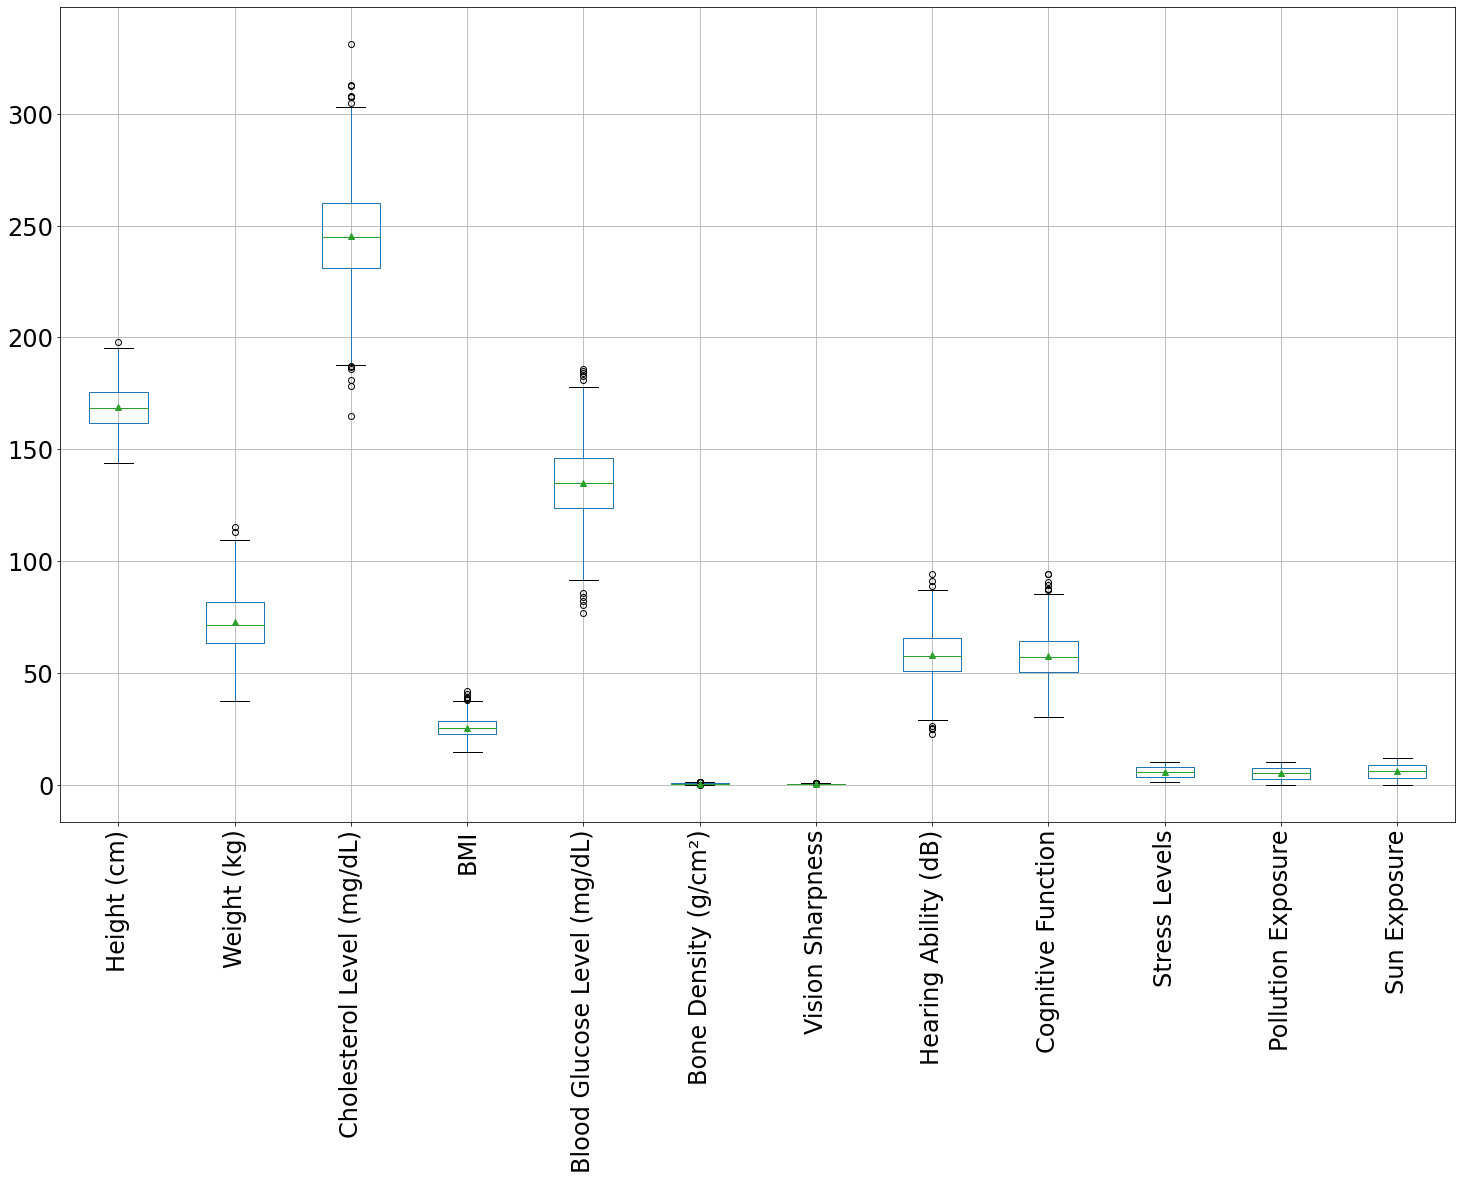

In [8]:
joves = data[data['Age_group'] == 2]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = list(joves.select_dtypes(include=numerics))
columns = columns[:len(columns)-2]
joves.boxplot(meanline=False,showmeans=True,rot=90,return_type='axes', column=columns, figsize=(25,15), fontsize=24)

In [9]:
joves["Height (cm)"].mean()-2*joves["Height (cm)"].std()

150.02845770842129

In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
columns = list(joves.select_dtypes(include=numerics))
columns = columns[:len(columns)-2]
tjoves = []
for c in columns:
    df = pandas.concat([joves[joves[c] > joves[c].mean() + 2*joves[c].std()], joves[joves[c] < joves[c].mean() - 2*joves[c].std()]])
    tjoves.append(df)
tadults = []
for c in columns:
    df = pandas.concat([adults[adults[c] > adults[c].mean() + 2*adults[c].std()], adults[adults[c] < adults[c].mean() - 2*adults[c].std()]])
    tadults.append(df)
tavis = []
for c in columns:
    df = pandas.concat([avis[avis[c] > avis[c].mean() + 2*avis[c].std()], avis[avis[c] < avis[c].mean() - 2*avis[c].std()]])
    tavis.append(df)

In [11]:
n=int(input())
print(columns[n])
print("Valors superiors a " + str(joves[columns[n]].mean() + 2*joves[columns[n]].std()) + " i inferiors a " + str(joves[columns[n]].mean() - 2*joves[columns[n]].std()))
tjoves[n]

2
Cholesterol Level (mg/dL)
Valors superiors a 290.8077459624733 i inferiors a 199.95893811831894


,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),Age_group
49,Male,164.109,76.731,138/99,293.470,28.491,129.859,0.295,0.200,67.878,Low,Former,None,Low-carb,Diabetes,Regular,Heart Disease,55.952,Fair,Normal,8.778,5.581,6.479,None,High,84,2
154,Male,168.118,60.574,149/94,294.867,21.432,137.194,0.808,0.437,64.292,High,Never,Frequent,Balanced,Hypertension,Occasional,None,60.866,Good,Insomnia,4.429,0.546,7.194,Postgraduate,Medium,61,2
199,Male,171.759,63.293,160/101,303.125,21.454,146.701,0.865,0.294,56.748,Low,Never,None,High-fat,Hypertension,Regular,Diabetes,76.054,Fair,Excessive,3.477,3.980,11.178,High School,High,63,2
241,Male,186.058,74.938,150/104,300.023,21.647,142.552,0.457,0.218,56.287,Low,Former,Occasional,Balanced,Heart Disease,Regular,Hypertension,66.312,Fair,Insomnia,3.379,2.872,6.136,Postgraduate,Low,74,2
297,Female,153.711,67.209,172/103,299.843,28.446,103.569,0.479,0.220,65.983,High,Former,None,High-fat,Hypertension,Regular,Hypertension,54.700,Good,Normal,3.496,5.002,1.927,High School,Medium,87,2
412,Male,181.227,96.454,164/97,295.737,29.368,167.834,0.609,0.329,68.187,Moderate,Never,None,Low-carb,None,Occasional,None,58.402,Good,Normal,7.330,8.913,7.630,Postgraduate,Low,69,2
422,Female,169.062,59.232,165/110,301.751,20.724,125.373,0.442,0.228,65.986,Moderate,Current,Occasional,High-fat,None,None,None,65.405,Good,Insomnia,3.475,1.384,1.437,Undergraduate,Low,78,2
454,Female,163.571,77.342,155/94,290.886,28.907,148.526,0.583,0.219,76.746,Moderate,Former,Occasional,Balanced,Diabetes,None,None,58.775,Fair,Insomnia,8.218,7.268,9.520,Undergraduate,Medium,83,2
513,Female,156.831,65.975,177/97,292.875,26.823,126.812,0.148,0.200,50.403,High,Former,Occasional,Vegetarian,Diabetes,Regular,Heart Disease,52.734,Poor,Insomnia,5.259,9.713,4.468,High School,Low,83,2
569,Male,160.643,83.721,168/96,300.439,32.442,177.495,0.403,0.200,62.738,Moderate,Current,Frequent,Vegetarian,Heart Disease,Occasional,Hypertension,47.790,Fair,Normal,2.754,0.811,9.547,High School,High,80,2


In [12]:
n=int(input())
print(columns[n])
print("Valors superiors a " + str(adults[columns[n]].mean() + 2*adults[columns[n]].std()) + " i inferiors a " + str(adults[columns[n]].mean() - 2*adults[columns[n]].std()))
tadults[n]

2
Cholesterol Level (mg/dL)
Valors superiors a 275.03887892693393 i inferiors a 185.36714588661678


,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),Age_group
258,Female,157.359,83.987,159/98,291.451,33.918,98.326,1.104,0.496,52.794,High,Former,None,Balanced,Heart Disease,Regular,Heart Disease,65.494,Fair,Normal,8.353,4.088,3.921,Undergraduate,Low,41,1
604,Male,166.287,78.725,139/98,278.866,28.471,127.683,0.680,0.657,40.845,Moderate,Never,Occasional,High-fat,Heart Disease,None,None,52.802,Fair,Normal,1.359,8.259,5.937,High School,Medium,56,1
914,Female,158.722,65.382,140/87,275.641,25.953,117.593,1.413,0.466,28.394,Moderate,Never,Occasional,Vegetarian,None,Occasional,None,58.931,Good,Insomnia,6.035,0.964,9.587,Postgraduate,Low,34,1
1159,Female,155.360,76.875,148/89,281.459,31.850,108.136,1.212,0.683,48.135,High,Former,Occasional,Vegetarian,None,None,None,65.846,Good,Normal,7.519,0.691,10.588,High School,Medium,39,1
1273,Female,168.606,49.236,122/95,282.058,17.320,128.107,1.211,0.604,47.880,Low,Current,None,High-fat,Hypertension,None,Hypertension,72.537,Good,Normal,9.166,8.597,0.690,Undergraduate,Medium,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,Female,161.084,67.027,130/88,185.355,25.831,136.851,1.249,0.572,28.344,Moderate,Former,None,Low-carb,Diabetes,Occasional,Heart Disease,71.380,Poor,Insomnia,1.454,5.407,8.582,Undergraduate,Medium,37,1
2854,Male,174.965,86.531,117/97,183.657,28.266,125.486,0.998,0.566,39.847,High,Former,Frequent,High-fat,Heart Disease,None,None,69.988,Good,Normal,9.521,3.947,11.665,Undergraduate,High,43,1
2860,Male,173.228,94.132,142/94,180.489,31.369,142.330,0.912,0.490,41.612,Moderate,Never,Occasional,Vegetarian,Diabetes,Occasional,Diabetes,67.490,Fair,Insomnia,6.449,6.938,10.010,None,High,55,1
2870,Female,161.168,56.497,135/90,183.665,21.750,120.280,1.127,0.540,39.121,High,Never,Occasional,Balanced,Hypertension,Regular,Heart Disease,47.311,Poor,Excessive,9.961,6.189,7.650,None,Low,39,1


In [13]:
n=int(input())
print(columns[n])
print("Valors superiors a " + str(avis[columns[n]].mean() + 2*avis[columns[n]].std()) + " i inferiors a " + str(avis[columns[n]].mean() - 2*avis[columns[n]].std()))
tavis[n]

2
Cholesterol Level (mg/dL)
Valors superiors a 290.8077459624733 i inferiors a 199.95893811831894


,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),Age_group
49,Male,164.109,76.731,138/99,293.470,28.491,129.859,0.295,0.200,67.878,Low,Former,None,Low-carb,Diabetes,Regular,Heart Disease,55.952,Fair,Normal,8.778,5.581,6.479,None,High,84,2
154,Male,168.118,60.574,149/94,294.867,21.432,137.194,0.808,0.437,64.292,High,Never,Frequent,Balanced,Hypertension,Occasional,None,60.866,Good,Insomnia,4.429,0.546,7.194,Postgraduate,Medium,61,2
199,Male,171.759,63.293,160/101,303.125,21.454,146.701,0.865,0.294,56.748,Low,Never,None,High-fat,Hypertension,Regular,Diabetes,76.054,Fair,Excessive,3.477,3.980,11.178,High School,High,63,2
241,Male,186.058,74.938,150/104,300.023,21.647,142.552,0.457,0.218,56.287,Low,Former,Occasional,Balanced,Heart Disease,Regular,Hypertension,66.312,Fair,Insomnia,3.379,2.872,6.136,Postgraduate,Low,74,2
297,Female,153.711,67.209,172/103,299.843,28.446,103.569,0.479,0.220,65.983,High,Former,None,High-fat,Hypertension,Regular,Hypertension,54.700,Good,Normal,3.496,5.002,1.927,High School,Medium,87,2
412,Male,181.227,96.454,164/97,295.737,29.368,167.834,0.609,0.329,68.187,Moderate,Never,None,Low-carb,None,Occasional,None,58.402,Good,Normal,7.330,8.913,7.630,Postgraduate,Low,69,2
422,Female,169.062,59.232,165/110,301.751,20.724,125.373,0.442,0.228,65.986,Moderate,Current,Occasional,High-fat,None,None,None,65.405,Good,Insomnia,3.475,1.384,1.437,Undergraduate,Low,78,2
454,Female,163.571,77.342,155/94,290.886,28.907,148.526,0.583,0.219,76.746,Moderate,Former,Occasional,Balanced,Diabetes,None,None,58.775,Fair,Insomnia,8.218,7.268,9.520,Undergraduate,Medium,83,2
513,Female,156.831,65.975,177/97,292.875,26.823,126.812,0.148,0.200,50.403,High,Former,Occasional,Vegetarian,Diabetes,Regular,Heart Disease,52.734,Poor,Insomnia,5.259,9.713,4.468,High School,Low,83,2
569,Male,160.643,83.721,168/96,300.439,32.442,177.495,0.403,0.200,62.738,Moderate,Current,Frequent,Vegetarian,Heart Disease,Occasional,Hypertension,47.790,Fair,Normal,2.754,0.811,9.547,High School,High,80,2


<Axes: >

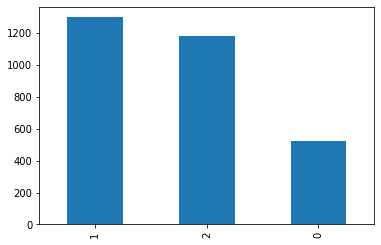

In [14]:
data.Age_group.value_counts().plot(kind='bar')

AttributeError: 'Axes' object has no attribute 'is_first_col'

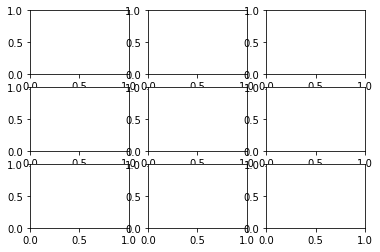

In [15]:
scatter_matrix(data[['Weight (kg)', 'Cholesterol Level (mg/dL)', 'Blood Glucose Level (mg/dL)']])
print('Scatter matrixes for correlations betwen numeriacal variables ')